In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json

from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN

In [53]:
data = np.load('../../feature_vector_v1.npy')
df_graph = pd.read_csv('../features/embedding.csv')
df_graph = df_graph.drop('type', axis=1)

In [54]:
print(data.shape, df_graph.shape)

(11076, 22) (11076, 128)


In [55]:
df_origin = pd.DataFrame(data)
df_graph = MinMaxScaler().fit_transform(df_graph)



In [56]:
tsne = TSNE(n_components=2)
df_graph = tsne.fit_transform(df_graph)
type(df_graph)

numpy.ndarray

In [57]:
df_graph = MinMaxScaler().fit_transform(df_graph)
df_graph = pd.DataFrame(df_graph)
df_graph.shape

(11076, 2)

In [58]:
data = pd.concat([df_origin, df_graph], axis=1)
data.shape

(11076, 24)

In [70]:
data = MinMaxScaler().fit_transform(data)

In [71]:
tsne = TSNE(n_components=2)
data_tsne = tsne.fit_transform(data)

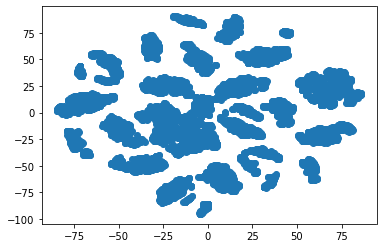

In [72]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])

[-1  0  1]
76
[[0.35092807 0.27631579 0.33576642 ... 0.29867987 0.45498425 0.94045597]
 [0.38341067 0.34210526 0.32116788 ... 0.28851964 0.53039241 0.5295012 ]
 [0.38051044 0.36184211 0.3649635  ... 0.21004566 0.61360914 0.54866993]
 ...
 [0.3387471  0.30921053 0.37226277 ... 0.87521368 0.63393831 0.15108699]
 [0.04060325 0.03947368 0.04379562 ... 0.8028169  0.79364276 0.37504429]
 [0.04060325 0.03947368 0.05109489 ... 0.84507042 0.023038   0.45950046]]


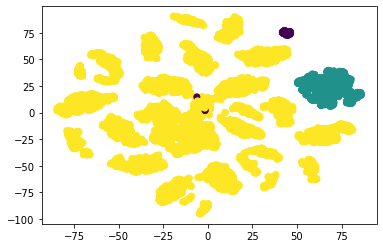

In [77]:
model = DBSCAN(eps=0.3, min_samples=50).fit(data)
print(np.unique(model.labels_))

labels_1 = model.labels_
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_1)
outliers_1 = data[labels_1 == -1]
print(len(outliers_1))
print(outliers_1)

In [74]:
outlier_index = [i for i, x in enumerate(labels_1) if x==-1]
outlier_index = [str(i) for i in outlier_index]
outlier_index

with open('../PPID_dict.json','r') as f:
    PPID_dict = json.load(f)

PPID_list = []
for i in outlier_index:
    PPID_list.append(PPID_dict[i])

PPID_list

[152221199312254016,
 152221199402231008,
 152221199405023008,
 152221199405121984,
 152221199411123008,
 152222199004150016,
 152222199106184992,
 152222199112116000,
 152222199204145984,
 152222199206164992,
 152222199302126016,
 152222199303302016,
 152222199311025984,
 152222199405054016,
 152222199409020992,
 152222199410286016,
 152222199504296000,
 152222199508129984,
 152223196605092000,
 152223198704091008,
 152223198808080000,
 152223199203073984,
 152223199208024992,
 152223199306235008,
 152223199308241984,
 152223199511152000,
 152224198112235008,
 152224199010192000,
 152224199102232992,
 152224199109152000,
 152224199109171008,
 152224199110121984,
 152224199209283008,
 152224199211103008,
 152224199212055008,
 152224199304100000,
 152224199310033984,
 152301195508251008,
 152301195807292000,
 152301196101041984,
 152301198303216000,
 152301199009142016,
 152301199103065984,
 152301199107169984,
 152301199109300000,
 152301199112100000,
 152301199202196000,
 152301199203

In [63]:
model = IsolationForest(max_samples=100).fit(data)
labels_2 = model.predict(data)

1373


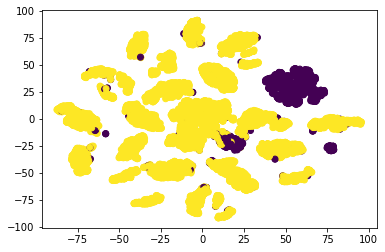

In [64]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_2)
outliers_2 = data[labels_2 == -1]
print(len(outliers_2))

In [65]:
print(len(outliers_2))

1373
